# I.Relevant imports

In [33]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates

# II.Data Cleaning

Loading main dataset resulting from API pull

In [9]:
findata = pd.read_csv('metric_final_set.csv')

In [10]:
findata.drop(columns = ['Unnamed: 0'] , inplace = True)
findata.dropna(thresh = findata.shape[0]*0.3, how = 'all', axis =1, inplace = True)

Some primary feature selection - we are looking to simplify the dimensionality of the dataset and focus on key investment features
    
 - This list is not exhaustive and may have some selection bias. We believe these metrics can lead us to extract information from company clusters.

In [13]:
findata1 = findata[['symbol','metric.netIncomeEmployeeAnnual', 'metric.revenueEmployeeAnnual','metric.receivablesTurnoverAnnual','metric.freeOperatingCashFlow/revenue5Y',
"metric.freeOperatingCashFlow/revenueTTM", 'metric.grossMargin5Y', 'metric.grossMarginAnnual',
'metric.netProfitMargin%Annual',
'metric.netProfitMargin5Y',
'metric.dividendGrowthRate5Y',
'metric.focfCagr5Y',
'metric.revenueGrowth5Y',
'metric.totalDebtCagr5Y',
'metric.netDebtAnnual',
'metric.peNormalizedAnnual',
'metric.pfcfShareAnnual',
'metric.currentEv/freeCashFlowAnnual',
'metric.freeCashFlowAnnual',
'metric.longTermDebt/equityAnnual',
'metric.netInterestCoverageAnnual',
'metric.payoutRatioAnnual',
'metric.quickRatioAnnual',
'metric.totalDebt/totalEquityAnnual',
'metric.dividendYield5Y',
'metric.dividendYieldIndicatedAnnual',
'metric.capitalSpendingGrowth5Y',
'metric.inventoryTurnoverAnnual',
]]

findata1.shape

(8831, 28)

Preliminary data observation

In [18]:
findata1.sample(n=10)

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.freeCashFlowAnnual,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual
8747,0802.HK,-1092551.000,1851612.0,2.05865,-282.61610,-42.65088,6.56952,7.09145,-59.00539,-247.93450,...,-20.138,0.00000,-0.63224,NaN,NaN,2.86832,NaN,NaN,112.04590,NaN
8481,5HC.SI,NaN,NaN,0.92467,-5.79187,13.75331,20.17317,21.17394,-11.60714,-1.04763,...,4.159,3.34592,-5.41713,NaN,1.52468,80.35314,NaN,NaN,39.02165,69.59708
7655,ITS.PA,2678.498,110673.5,3.53710,1.13287,3.79998,55.47870,66.39867,2.42018,1.97398,...,1.491,21.56385,17.56013,28.86278,1.51006,27.87480,1.64584,1.81269,-15.02125,2574.45700
3119,ALCLS.PA,NaN,NaN,7.75379,NaN,NaN,NaN,NaN,-501.13960,-201.43060,...,NaN,14.76884,NaN,NaN,6.20764,15.10743,NaN,NaN,NaN,NaN
896,NKSH,73852.010,196858.3,NaN,18.44940,28.19555,NaN,NaN,37.51530,34.90341,...,8.768,0.00000,NaN,51.71190,NaN,0.00000,2.94947,5.10638,17.59082,NaN
7112,002594.SZ,16889.980,617688.9,2.42042,-12.49838,-11.25555,16.90662,15.51149,2.73438,3.73316,...,-9439.674,25.22611,2.33909,20.01807,0.76247,145.54210,0.33174,0.37091,25.35639,4.75644
1557,CYOU,NaN,NaN,9.44223,NaN,NaN,73.94880,79.05310,39.00391,26.51033,...,NaN,0.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN
6661,0678.HK,NaN,NaN,33.57072,-88.72244,-65.27755,NaN,NaN,-10.16022,16.27005,...,-7898.142,59.35254,-2.86868,NaN,1.18548,64.69032,NaN,23.08735,45.60590,NaN
3132,MRVL,290500.700,494895.7,5.47793,2.89860,4.22691,52.55143,50.27270,58.69939,9.12296,...,114.091,16.58133,-1.60620,10.07157,1.71019,16.58133,1.35105,1.07000,1.74510,4.48165
7848,GE.MI,NaN,NaN,NaN,4.79779,1.70847,66.37975,66.10524,5.01085,3.38551,...,-2.198,31.88663,31.42633,30.61512,1.18480,50.16124,3.82088,3.65854,23.42389,NaN


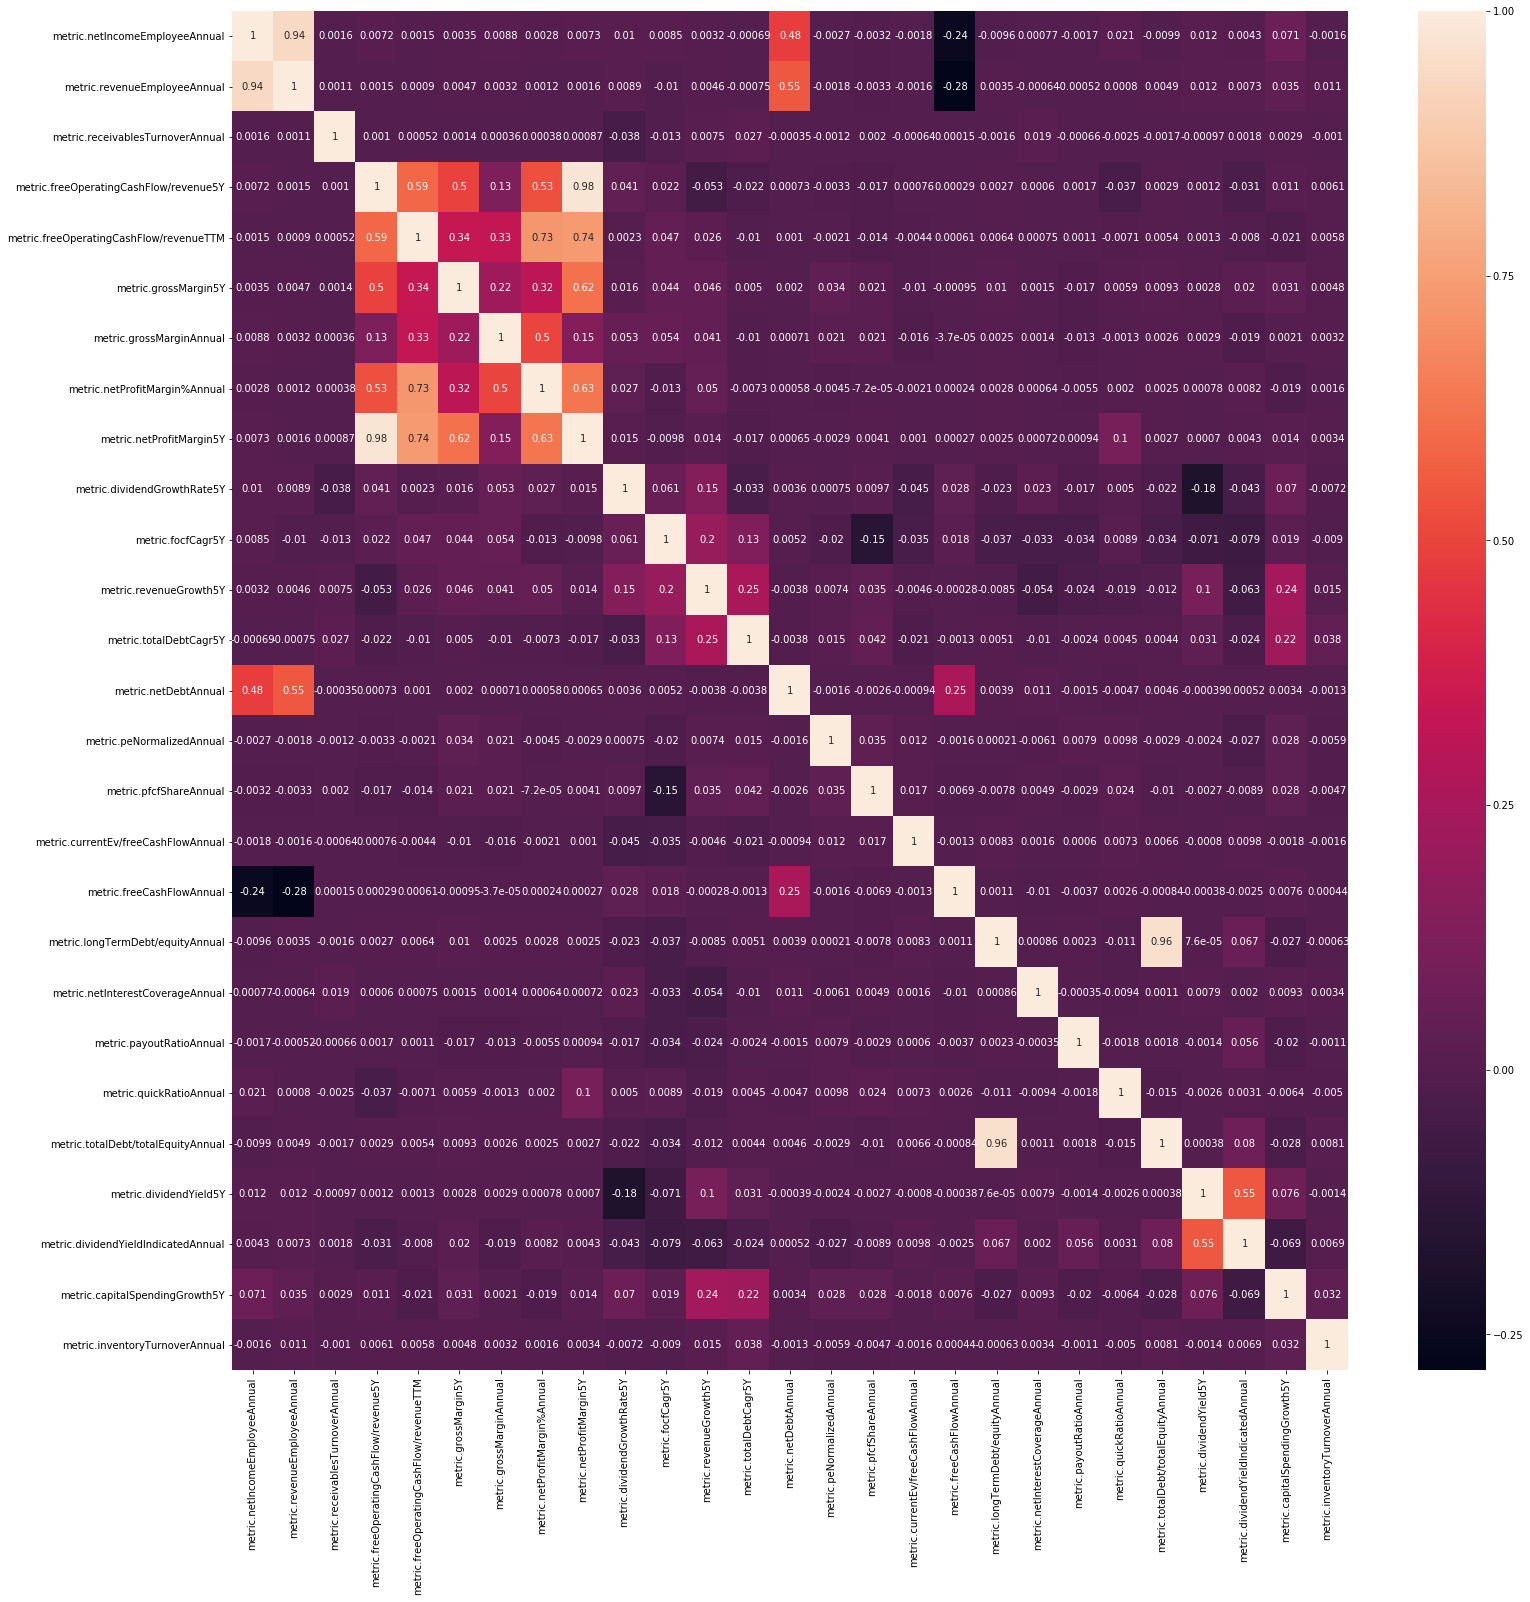

In [17]:
Xalt = findata1.iloc[:,1:28]
plt.figure(figsize = [25,25])
corr = sns.heatmap(Xalt.corr(), annot=True);

# III. KNN Imputation

   - We elected KNNImputer to fill in missing values with the rationale that similar companies in terms of ratios would be grouped within the matrix dimensions and provide accurate inputs that would not affect the clustering outcomes. 20 nearest neighbors should preserve the accuracy of the data and avoid adding too much variance to the data.

In [21]:
imputer = KNNImputer(n_neighbors = 20)
complete1 = imputer.fit_transform(Xalt)


In [22]:
df = pd.DataFrame(complete1, index = [findata1.index, findata1.iloc[:,0]], columns = Xalt.columns).reset_index()
df.drop(columns = ['level_0'], inplace = True)

In [23]:
df

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.freeCashFlowAnnual,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual
0,AAPL,410825.300000,1934379.000,11.284440,19.40911,18.63398,38.718250,37.817770,21.23809,21.89832,...,44777.00000,101.457600,21.364915,25.570070,1.501290,119.404800,1.486500,1.275840,1.352890,40.134460
1,BAC,133155.300000,442932.000,7.973046,29.93606,61.20183,53.779052,55.803548,30.06225,25.11008,...,55843.00000,81.795250,23.594304,23.640280,0.544362,161.458000,1.589900,3.594610,11.858569,9.623854
2,AMZN,16052.580000,388131.400,15.074940,6.57306,7.71885,38.289440,40.990010,4.13586,2.87305,...,21653.00000,65.273930,18.933590,39.613199,0.863630,67.379950,2.774091,5.604027,28.074190,8.788510
3,T,58268.480000,705031.100,6.973920,5.05381,7.91697,53.188140,53.562780,8.26467,8.60255,...,14345.00000,82.134500,3.773710,108.115100,0.753100,88.560480,5.342350,7.574650,-1.722560,29.863710
4,GOOGL,315551.100000,1487178.000,7.012260,20.90443,19.13541,58.188350,55.580540,21.21811,21.46707,...,30972.00000,2.260700,22.797158,0.000000,3.351960,2.260700,3.017829,5.483896,16.413080,68.277300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,TEXF.BR,-251954.217000,263252.880,22.760760,4.94381,25.43451,47.208966,48.544562,49.75335,40.47186,...,7.30200,7.820562,51.533630,26.649310,0.830620,8.766772,1.846710,2.563280,-7.603030,22.795993
8827,TRB.L,-284442.197845,322311.800,5.642860,1.82452,4.26416,44.941730,50.098450,-3.78852,-9.72124,...,3.33500,10.492030,67.748030,1102.903429,2.321427,13.471060,1.291330,2.123890,1.130880,41.726025
8828,ZO1.DE,-17904.200000,2260676.000,40.701720,1.02939,1.63264,27.269160,29.119890,-0.79198,0.12667,...,24.87641,61.339690,-6.080280,54.426176,0.707650,81.612810,2.545007,3.007997,-7.135260,9.588630
8829,TRY.AX,-937872.754450,378203.079,114.245900,-19.62623,-0.35878,-5.924430,-0.399530,-44.23042,-59.94664,...,9.81200,0.128460,-4.777970,37.573755,0.311520,8.128660,3.800539,8.609218,-25.616750,8.136950


# IV. Currency Conversion

In [61]:
tick_conv = pd.read_csv('tickers_final.csv')
c = CurrencyRates()

In [29]:
conv = pd.merge(df, tick_conv, left_on = 'symbol', right_on = 'Ticker').drop(columns = ['Ticker', 'Unnamed: 0'])

In [31]:
conv.sample()

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual,Name,Exchange,Category Name,Country
3658,0144.HK,224307.65595,1576895.101,2.59644,-6.403368,-66.899958,42.15746,41.76219,103.8211,81.04142,...,0.7979,49.40401,2.683783,11.00811,8.727374,44.48069,CHINA MER PORT,HKG,Shipping,Hong Kong


In [77]:
country_ccy = pd.DataFrame(conv.Country.unique(), columns = ['country'])


In [78]:
mapping = {'USA': 'USD', 'Australia': 'AUD', 'Germany': 'EUR', 'France': 'EUR', 'Canada':'CAD',
           'United Kingdom': 'GBP', 'Norway': 'NOK', 'Sweden': 'SEK', 'Denmark': 'DKK', 'Singapore': 'SGD', 'Netherlands':'EUR', 'Hong Kong':'HKD', 'Spain': 'EUR', 'Italy':'EUR', 'Belgium': 'EUR'}

In [79]:
country_ccy['ccy'] = country_ccy.country.map((mapping))

In [112]:
country_ccy['ref_ccy'] = 'USD'
country_ccy

,country,ccy,ref_ccy
0,USA,USD,USD
1,Australia,AUD,USD
2,Germany,EUR,USD
3,France,EUR,USD
4,Canada,CAD,USD
5,United Kingdom,GBP,USD
6,Norway,NOK,USD
7,Sweden,SEK,USD
8,Denmark,DKK,USD
9,Singapore,SGD,USD


In [116]:
def usd_conv(row):
    return c.get_rate(row['ref_ccy'],row ['ccy'])

In [117]:
country_ccy['rate_vs_usd'] = country_ccy.apply(usd_conv, axis =1)

In [118]:
country_ccy

,country,ccy,ref_ccy,rate_vs_usd
0,USA,USD,USD,1.000000
1,Australia,AUD,USD,1.605227
2,Germany,EUR,USD,0.920217
3,France,EUR,USD,0.920217
4,Canada,CAD,USD,1.404712
5,United Kingdom,GBP,USD,0.805788
6,Norway,NOK,USD,10.319591
7,Sweden,SEK,USD,10.072237
8,Denmark,DKK,USD,6.870065
9,Singapore,SGD,USD,1.424404
